In [79]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [80]:
# 載入加州房價資料集
housing = fetch_california_housing() # 此為numpy資料
print(housing['data'].shape)
print(housing['data'].ndim)
# housing['target']

(20640, 8)
2


In [81]:
display(pd.DataFrame(housing['data'],columns=housing['feature_names']))
display(pd.Series(housing['target'][:200]))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0      4.526
1      3.585
2      3.521
3      3.413
4      3.422
       ...  
195    1.150
196    0.950
197    0.964
198    0.720
199    0.713
Length: 200, dtype: float64

In [82]:
housing['data'][:200] # 抓取前200筆資料

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   2.59      ,   52.        ,    4.38996139, ...,    3.34362934,
          37.77      , -122.22      ],
       [   2.57      ,   52.        ,    4.20218579, ...,    3.3442623 ,
          37.77      , -122.23      ],
       [   2.6429    ,   52.        ,    3.74603175, ...,    3.29365079,
          37.78      , -122.23      ]], shape=(200, 8))

In [83]:
# 只使用前200筆資料作為展示
sample_size = 200
X_full = housing.data[:sample_size] # 一般使用 大寫X 代表特徵
y_full = housing.target[:sample_size] # 房價(單位:十萬美元)
X_full.shape
y_full.shape

(200,)

In [84]:
# 使用**平均房間數**作為預測特徵(索引2)
feature_idx = 2
X = X_full[:,feature_idx].reshape(-1,1)
# X = X_full[:,:] 為使用全部的資料
y = y_full * 10

In [85]:
# 分割訓練和測試資料(80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(160, 1)

In [86]:
# 訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
# 預測
# 訓練資料的預測
y_train_pred = model.predict(X_train)

# 測試資料的預測
y_test_pred = model.predict(X_test)

In [88]:
# 計算評估指標
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(r2, mse, rmse)
# r2 = 模型的特徵能解釋目標變數中多少比例的變動
# mse = 衡量模型預測值與真實值之間平均平方誤差的大小

0.09944061876372645 89.54827726577517 9.462995153003893


In [89]:
# 生成迴歸線資料(用於繪圖)
X_line = np.linspace(X.min(),X.max(),100).reshape(-1,1)
y_line = model.predict(X_line)

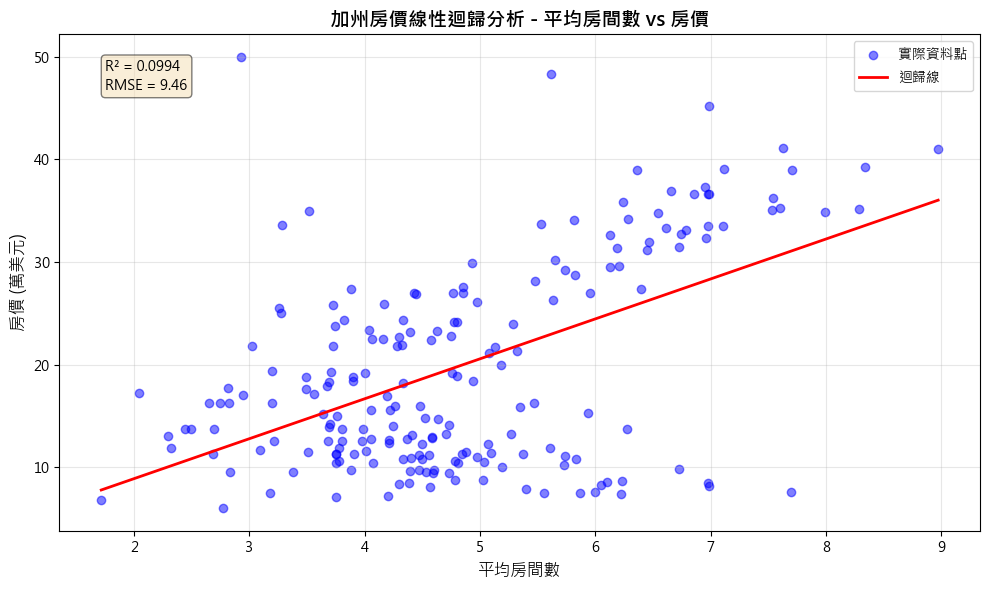

In [90]:
import matplotlib.pyplot as plt

# 設置中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False

# 建立圖表
plt.figure(figsize=(10, 6))

# 繪製原始資料點
plt.scatter(X, y, alpha=0.5, label='實際資料點', color='blue')

# 繪製迴歸線
plt.plot(X_line, y_line, color='red', linewidth=2, label='迴歸線')

# 設定標題和標籤
plt.title('加州房價線性迴歸分析 - 平均房間數 vs 房價', fontsize=14, fontweight='bold')
plt.xlabel('平均房間數', fontsize=12)
plt.ylabel('房價 (萬美元)', fontsize=12)

# 加入網格
plt.grid(True, alpha=0.3)

# 加入圖例
plt.legend(fontsize=10)

# 顯示 R² 分數
plt.text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.2f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [91]:
X_train.flatten().tolist()
y_train.tolist()

[13.129999999999999,
 9.64,
 19.14,
 13.260000000000002,
 37.36,
 11.5,
 13.200000000000001,
 16.29,
 21.669999999999998,
 11.879999999999999,
 24.310000000000002,
 15.18,
 26.97,
 29.52,
 23.410000000000004,
 6.75,
 48.33,
 17.0,
 11.67,
 18.380000000000003,
 9.75,
 12.5,
 11.52,
 21.349999999999998,
 9.719999999999999,
 34.76,
 11.879999999999999,
 9.549999999999999,
 16.25,
 36.89,
 9.379999999999999,
 29.23,
 26.99,
 15.0,
 32.76,
 22.41,
 9.379999999999999,
 36.28,
 25.779999999999998,
 21.85,
 35.21,
 10.83,
 14.25,
 13.75,
 11.22,
 9.82,
 21.840000000000003,
 10.45,
 11.61,
 7.5,
 11.39,
 33.14,
 27.34,
 10.489999999999998,
 24.18,
 12.5,
 24.380000000000003,
 29.92,
 10.549999999999999,
 36.61,
 34.22,
 11.040000000000001,
 32.35,
 29.64,
 22.5,
 23.31,
 28.15,
 8.61,
 25.5,
 27.37,
 17.14,
 45.26,
 7.199999999999999,
 31.47,
 8.25,
 38.95,
 7.35,
 18.44,
 21.880000000000003,
 10.89,
 15.540000000000001,
 27.57,
 41.03,
 35.24,
 10.75,
 9.97,
 11.19,
 22.770000000000003,
 11.25

In [92]:
response = {
    "success":True,
    "data":{
        "train":{
            "x": X_train.flatten().tolist(),
            "y": y_train.tolist(),
            "y_pred": y_train_pred.tolist()
        },
        "test":{
            "x": X_test.flatten().tolist(),
            "y": y_test.tolist(),
            "y_pred": y_test_pred.tolist()
        },
        "regression_line":{
            "x": X_line.flatten().tolist(),
            "y": y_line.tolist(),
        }
    },
    "metrics":{
        "r2_score": round(r2, 4),
        "mse": round(mse, 2),
        "rmse": round(rmse, 2),
        "coefficient": round(model.coef_[0], 2),
        "intercept": round(model.intercept_, 2)
    },
    "description":{
        "dataset": "加州房價資料集",
        "samples": len(y),
        "train_size": len(y_train),
        "test_size": len(y_test),
        "feature_name": "平均房間數",
        "feature_unit": "間",
        "target_name": "房價",
        "target_unit": "萬美元",
        "info": "此資料集取自 1990 年加州人口普查資料"
    }

}

In [93]:
response

{'success': True,
 'data': {'train': {'x': [4.412903225806452,
    4.38996138996139,
    4.757281553398058,
    5.270142180094787,
    6.947890818858561,
    3.510355029585799,
    4.703225806451613,
    5.465454545454546,
    5.132246376811594,
    2.3157894736842106,
    3.822274881516588,
    3.639751552795031,
    4.761658031088083,
    6.127348643006263,
    4.040501446480231,
    1.7142857142857142,
    5.615384615384615,
    2.9456,
    3.0902394106813995,
    3.8949152542372882,
    3.882608695652174,
    3.681318681318681,
    4.882086167800454,
    5.322649572649572,
    4.6022727272727275,
    6.546391752577319,
    3.7724867724867726,
    4.528052805280528,
    2.74585635359116,
    6.657992565055762,
    4.58968058968059,
    5.735343383584589,
    4.851351351351352,
    3.7590361445783134,
    6.742627345844504,
    4.578034682080925,
    4.7280334728033475,
    7.54,
    3.7248,
    3.7270058708414875,
    8.288135593220339,
    5.830917874396135,
    3.700657894736842,
